In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [3]:
data = pd.merge(transactions, customers, on="CustomerID", how="inner")

In [7]:
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean'],
    'TransactionID': 'count',
    'CustomerName': 'first',
    'Region': 'first'
}).reset_index()

In [8]:
customer_data = pd.get_dummies(customer_data, columns=['Region','CustomerName'], drop_first=True)

<ipython-input-8-51be4c44edd0>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  customer_data = pd.get_dummies(customer_data, columns=['Region','CustomerName'], drop_first=True)


In [15]:
customer_data.columns = ['CustomerID', 'TotalSpent', 'AvgTransactionValue', 'NumTransactions'] + list(customer_data.columns[4:])

In [16]:
X = customer_data.drop(columns=['CustomerID'])

In [17]:
db_scores = []
silhouette_scores = []
for n_clusters in range(2, 11):  # Trying between 2 and 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate Davies-Bouldin Index
    db_index = davies_bouldin_score(X, cluster_labels)
    db_scores.append(db_index)

    # Calculate Silhouette Score
    sil_score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(sil_score)

In [18]:
optimal_clusters = np.argmin(db_scores) + 2
print(f"Optimal number of clusters: {optimal_clusters}")
print(f"DB Index for optimal clusters: {db_scores[optimal_clusters - 2]}")

Optimal number of clusters: 7
DB Index for optimal clusters: 0.5352009718349171


In [19]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_data['Cluster'] = kmeans.fit_predict(X)

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

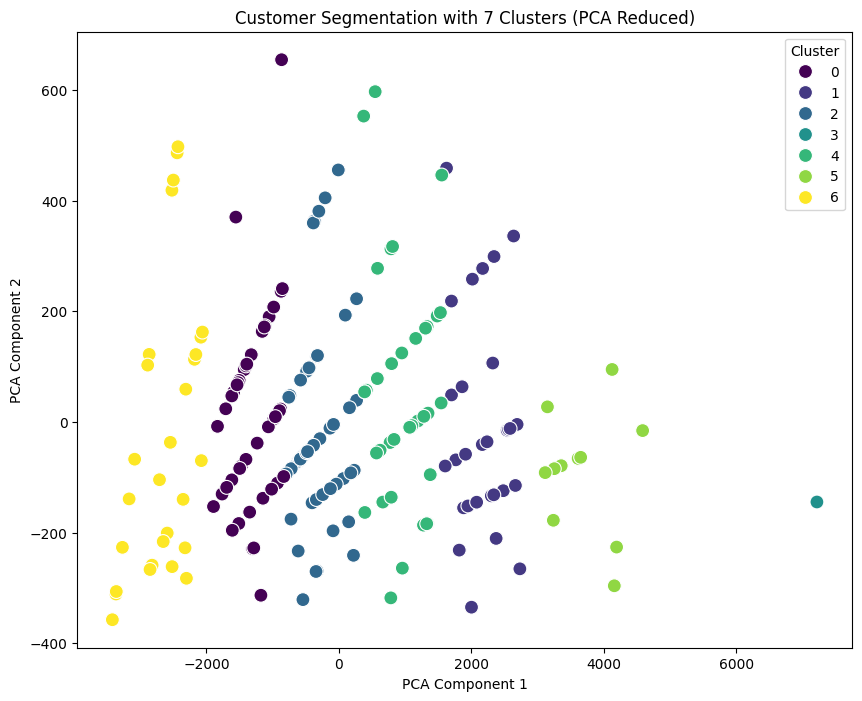

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=customer_data['Cluster'], palette="viridis", s=100)
plt.title(f"Customer Segmentation with {optimal_clusters} Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()